In [74]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("pf_suvs_i302_1s2025.csv")

# Eliminar columna 'Unnamed: 0' si existe
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

#redondear las columnas numéricas 
for col in df.select_dtypes(include=['float64']).columns:
    df[col] = df[col].round(2)
# Mostrar las nuevas columnas

# Limpiar 'Kilómetros': quitar ' km', puntos y convertir a float
df['Kilómetros'] = df['Kilómetros'].astype(str).str.replace('.', '', regex=False)
df['Kilómetros'] = df['Kilómetros'].str.replace(' km', '', regex=False)
df['Kilómetros'] = pd.to_numeric(df['Kilómetros'], errors='coerce')
df.head()

,Marca,Modelo,Año,Versión,Color,Tipo de combustible,Puertas,Transmisión,Motor,Tipo de carrocería,Con cámara de retroceso,Kilómetros,Título,Precio,Moneda,Descripción,Tipo de vendedor
0,Ford,Ecosport,2020.0,1.5 Freestyle 123cv 4x2,Blanco,Nafta,5.0,Manual,1.5,SUV,No,640000,Ford Ecosport 1.5 Freestyle 123cv 4x2,20500000.0,$,Descubre nuestro impresionante Ford Eco Sport ...,concesionaria
1,Volkswagen,Tiguan,2024.0,LIFE 350 TSI 4M,Negro,Nafta,5.0,Automática secuencial,2.0 L 230 CV 350 TSI,SUV,Sí,0,Tiguan Life 350 Tsi 4m Ar,55999900.0,$,AUTOTAG S.A. Concesionario Oficial N°1 Volkswa...,tienda
2,Volkswagen,Tiguan Allspace,2019.0,1.4 Tsi Trendline 150cv Dsg,Negro,Nafta,5.0,Automática,1.4,SUV,NaN,653000,Volkswagen Tiguan Allspace 1.4 Tsi Trendline 1...,28300.0,US$,-HERMOSA TIGUAN 1.4 TSI DSG-MANTENIMIENTO/SERV...,particular
3,Ford,Ecosport,2017.0,1.5 Titanium 123Cv 4X2,Blanco,Nafta,5.0,Manual,1.5,SUV,NaN,768980,Ford Ecosport 1.5 Titanium 123Cv 4X2,20090000.0,$,"En GRUPO RANDAZZO, tenemos el auto que estas b...",tienda
4,Jeep,Compass,2021.0,2.4 Sport At,NaN,Nafta,5.0,Automática,2.4,SUV,NaN,1090000,Jeep Compass 2.4 Sport At,23000.0,US$,•Unico dueño•Todos los services oficiales•Bate...,particular


In [75]:
# Primero normalizamos los valores de moneda
df['Moneda'] = df['Moneda'].replace({'$': 'peso', 'U$S': 'dolar'})

# Tasa de conversión
PESO_A_DOLAR = 1165

# Crear nueva columna con el precio en dólares
df['Precio_usd'] = df.apply(
    lambda row: row['Precio'] / PESO_A_DOLAR if row['Moneda'] == 'peso' else row['Precio'],
    axis=1
)

# (Opcional) Eliminar columnas viejas si ya no las querés
# df = df.drop(columns=['Precio', 'Moneda'])

# Mostrar las primeras filas para verificar
df.head()

,Marca,Modelo,Año,Versión,Color,Tipo de combustible,Puertas,Transmisión,Motor,Tipo de carrocería,Con cámara de retroceso,Kilómetros,Título,Precio,Moneda,Descripción,Tipo de vendedor,Precio_usd
0,Ford,Ecosport,2020.0,1.5 Freestyle 123cv 4x2,Blanco,Nafta,5.0,Manual,1.5,SUV,No,640000,Ford Ecosport 1.5 Freestyle 123cv 4x2,20500000.0,peso,Descubre nuestro impresionante Ford Eco Sport ...,concesionaria,17596.566524
1,Volkswagen,Tiguan,2024.0,LIFE 350 TSI 4M,Negro,Nafta,5.0,Automática secuencial,2.0 L 230 CV 350 TSI,SUV,Sí,0,Tiguan Life 350 Tsi 4m Ar,55999900.0,peso,AUTOTAG S.A. Concesionario Oficial N°1 Volkswa...,tienda,48068.583691
2,Volkswagen,Tiguan Allspace,2019.0,1.4 Tsi Trendline 150cv Dsg,Negro,Nafta,5.0,Automática,1.4,SUV,NaN,653000,Volkswagen Tiguan Allspace 1.4 Tsi Trendline 1...,28300.0,US$,-HERMOSA TIGUAN 1.4 TSI DSG-MANTENIMIENTO/SERV...,particular,28300.000000
3,Ford,Ecosport,2017.0,1.5 Titanium 123Cv 4X2,Blanco,Nafta,5.0,Manual,1.5,SUV,NaN,768980,Ford Ecosport 1.5 Titanium 123Cv 4X2,20090000.0,peso,"En GRUPO RANDAZZO, tenemos el auto que estas b...",tienda,17244.635193
4,Jeep,Compass,2021.0,2.4 Sport At,NaN,Nafta,5.0,Automática,2.4,SUV,NaN,1090000,Jeep Compass 2.4 Sport At,23000.0,US$,•Unico dueño•Todos los services oficiales•Bate...,particular,23000.000000


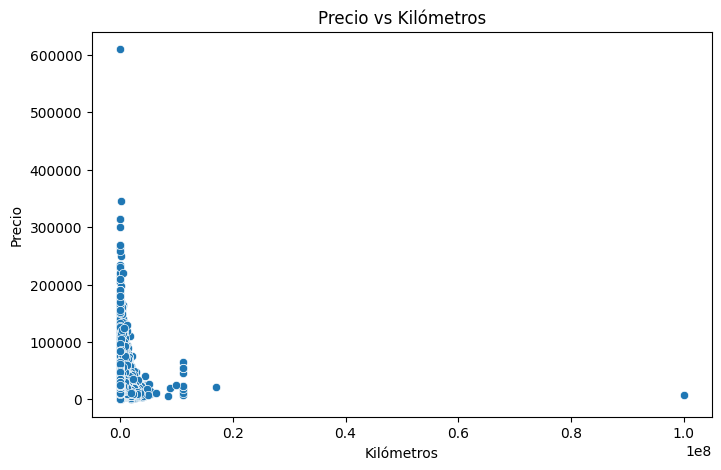

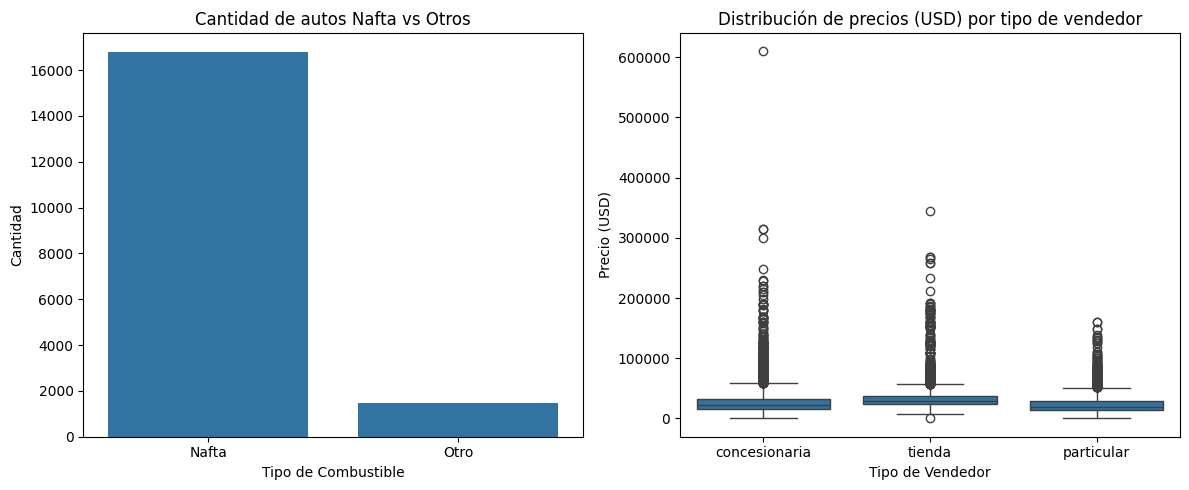

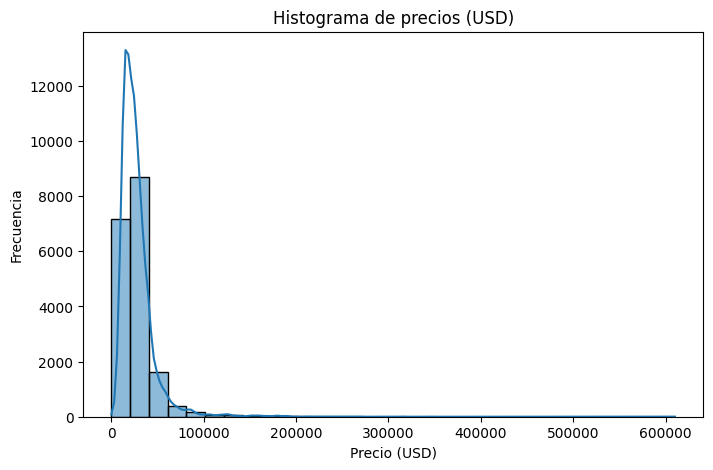

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- GRAFICO 1: Scatter Precio vs Kilómetros ---
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Kilómetros', y='Precio_usd')
plt.title('Precio vs Kilómetros')
plt.xlabel('Kilómetros')
plt.ylabel('Precio')
plt.show()

# --- GRAFICO 2: Boxplot Nafta (incluye Híbrido/Nafta) vs Otros ---

# Crear columna binaria para nafta
df['Combustible_nafta'] = df['Tipo de combustible'].apply(
    lambda x: 'Nafta' if 'nafta' in str(x).lower() else 'Otro'
)

# --- GRAFICOS: Cantidad por tipo de combustible + Boxplot por tipo de vendedor ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico 1: Countplot Nafta vs Otros
sns.countplot(data=df, x='Combustible_nafta', ax=axes[0])
axes[0].set_title('Cantidad de autos Nafta vs Otros')
axes[0].set_xlabel('Tipo de Combustible')
axes[0].set_ylabel('Cantidad')

# Gráfico 2: Boxplot Precio_usd por Tipo de vendedor
sns.boxplot(data=df, x='Tipo de vendedor', y='Precio_usd', ax=axes[1])
axes[1].set_title('Distribución de precios (USD) por tipo de vendedor')
axes[1].set_xlabel('Tipo de Vendedor')
axes[1].set_ylabel('Precio (USD)')

plt.tight_layout()
plt.show()
# --- GRAFICO 3: Histograma de precios ---
plt.figure(figsize=(8, 5))
sns.histplot(df['Precio_usd'], bins=30, kde=True)
plt.title('Histograma de precios (USD)')
plt.xlabel('Precio (USD)')
plt.ylabel('Frecuencia')
plt.show()

In [77]:
#maximo precio en dolares y su marca
max_precio_usd = df['Precio_usd'].max()
marca_max_precio = df.loc[df['Precio_usd'] == max_precio_usd, 'Marca'].values[0]
print(f"La marca del auto con el precio máximo es: {marca_max_precio}")
# Precio promedio en dólares
precio_promedio_usd = df['Precio_usd'].mean()
print(f"El precio promedio en dólares es: {precio_promedio_usd:.2f} USD")
# Precio mínimo en dólares y su marca
min_precio_usd = df['Precio_usd'].min()
marca_min_precio = df.loc[df['Precio_usd'] == min_precio_usd, 'Marca'].values[0]
print(f"El precio mínimo en dólares es: {min_precio_usd:.2f} USD, marca: {marca_min_precio}")

La marca del auto con el precio máximo es: Land Rover
El precio promedio en dólares es: 27852.26 USD
El precio mínimo en dólares es: 102.15 USD, marca: Jeep


In [78]:
def buscar_precio_usd(df, datos_auto):
    """
    Busca autos que coincidan con los campos provistos en datos_auto y devuelve sus precios en dólares.
    Si no encuentra coincidencias, devuelve un mensaje.
    """
    filtro = df.copy()
    for clave, valor in datos_auto.items():
        if clave not in df.columns:
            return f"Columna '{clave}' no encontrada en el dataset"
        filtro = filtro[filtro[clave] == valor]
    
    if not filtro.empty:
        return filtro['Precio_usd'].values.tolist()
    else:
        return "Auto no encontrado en el dataset"
auto = {
    'Marca': 'Ford',
    'Kilómetros': 0.0  # fijate si esto funciona
}
precio_encontrado = buscar_precio_usd(df, auto)
print(f"Precio encontrado: {precio_encontrado}")


Precio encontrado: [51330.47210300429, 41936.48068669528, 51416.309012875536, 39484.978540772536, 39957.08154506438, 39914.16309012876, 42575.107296137336, 53648.0686695279, 40280.896137339056, 40171.673819742486, 36200.0, 41974.24892703863, 48755.36480686695, 40000.858369098714, 42575.107296137336, 42446.35193133047, 44635.19313304721, 35828.58369098712, 40001.71673819742, 34037.15450643777, 50643.776824034336, 40000.0, 40042.91845493562, 51000.0, 41974.24892703863, 39957.08154506438, 42832.61802575107, 45064.377682403436, 37000.0, 54500.0, 42852.01716738197, 42575.107296137336, 41974.24892703863, 51158.7982832618, 46781.11587982833, 42852.01716738197, 39227.4678111588, 41630.90128755365, 39484.978540772536, 40085.83690987124, 42575.107296137336, 41201.71673819742, 35879.82832618026, 51158.7982832618, 39957.08927038626, 39484.978540772536, 39484.978540772536, 46000.0, 40900.0, 47707.124463519314, 57900.0, 40000.0, 47964.80686695279, 41630.90128755365, 41193.1330472103, 39957.081545064

Primeras filas del dataset:
   Unnamed: 0       Marca           Modelo     Año  \
0           0        Ford         Ecosport  2020.0   
1           1  Volkswagen           Tiguan  2024.0   
2           2  Volkswagen  Tiguan Allspace  2019.0   
3           3        Ford         Ecosport  2017.0   
4           4        Jeep          Compass  2021.0   

                       Versión   Color Tipo de combustible  Puertas  \
0      1.5 Freestyle 123cv 4x2  Blanco               Nafta      5.0   
1              LIFE 350 TSI 4M   Negro               Nafta      5.0   
2  1.4 Tsi Trendline 150cv Dsg   Negro               Nafta      5.0   
3       1.5 Titanium 123Cv 4X2  Blanco               Nafta      5.0   
4                 2.4 Sport At     NaN               Nafta      5.0   

             Transmisión                  Motor Tipo de carrocería  \
0                 Manual                    1.5                SUV   
1  Automática secuencial  2.0 L 230 CV  350 TSI                SUV   
2         

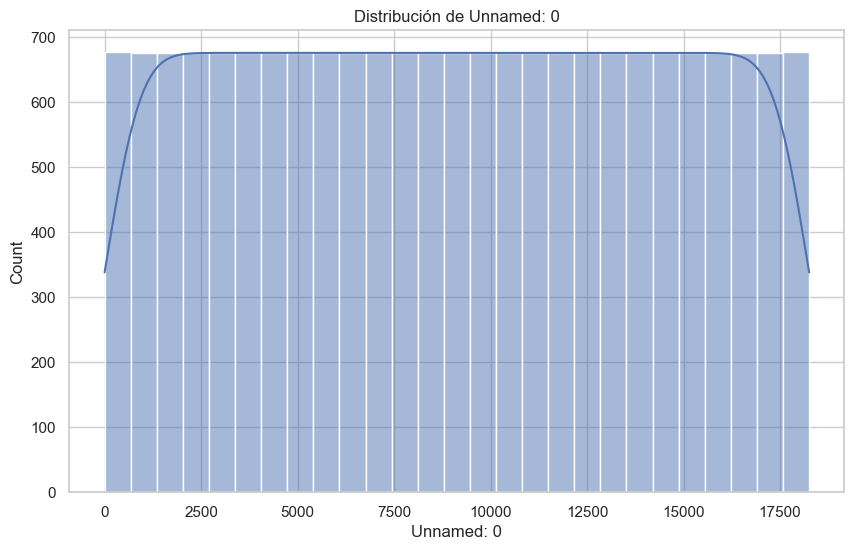

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001DD4DF787C0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [1]:
# --- Importar librerías ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuraciones de visualización ---
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# --- Cargar el dataset ---
df = pd.read_csv("dataset.csv")

# --- Vista general de los datos ---
print("Primeras filas del dataset:")
print(df.head())

print("\nInformación general:")
print(df.info())

print("\nEstadísticas descriptivas:")
print(df.describe(include='all'))

# --- Valores faltantes ---
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# --- Variables categóricas: valores únicos ---
print("\nValores únicos por columna categórica:")
for col in df.select_dtypes(include="object").columns:
    print(f"{col}: {df[col].nunique()} valores únicos")

# --- Distribución de variables numéricas ---
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
for col in num_cols:
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

# --- Boxplots para detectar outliers ---
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()




In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Copia de trabajo ---
df_prep = pd.read_csv("dataset_crudo.csv")

# 1. Columna 'Con cámara de retroceso'  →  tres valores explícitos
df_prep['Con cámara de retroceso'] = (
    df_prep['Con cámara de retroceso']
        .str.strip().str.lower()        # limpieza básica
        .map({'sí': 'sí', 'no': 'no'})  # normaliza si venían acentos/casings
        .fillna('sin_info')             # gran masa de NaNs queda como 'sin_info'
)

# 2. Rellenar categóricas de baja proporción de NaNs con 'desconocido'
categ_baja_nan = ['Color', 'Transmisión', 'Motor']
for col in categ_baja_nan:
    df_prep[col] = (
        df_prep[col]
        .astype(str)        # por si hay mezclas numéricas
        .str.strip().str.lower()
        .fillna('desconocido')
        .replace({'nan': 'desconocido', 'none': 'desconocido'})
    )

# 3. Eliminar columna índice sobrante
if 'Unnamed: 0' in df_prep.columns:
    df_prep = df_prep.drop(columns='Unnamed: 0')

# 4. (Opcional) verificar que ya no existan NaNs
print(df_prep.isnull().sum())


Marca                      0
Modelo                     0
Año                        0
Versión                    0
Color                      0
Tipo de combustible        0
Puertas                    0
Transmisión                0
Motor                      0
Tipo de carrocería         0
Con cámara de retroceso    0
Kilómetros                 0
Título                     0
Precio                     0
Moneda                     0
Descripción                0
Tipo de vendedor           0
dtype: int64


In [6]:
print("\nEstadísticas descriptivas:")
print(df_prep.describe(include='all'))


Estadísticas descriptivas:
        Marca    Modelo            Año            Versión  Color  \
count   18254     18254   18254.000000              18254  18254   
unique     47       137            NaN               2072     65   
top      Ford  Ecosport            NaN  1.6 Exclusive Cvt   gris   
freq     2161      1569            NaN                320   5468   
mean      NaN       NaN    2042.796209                NaN    NaN   
std       NaN       NaN    3217.260996                NaN    NaN   
min       NaN       NaN    1981.000000                NaN    NaN   
25%       NaN       NaN    2016.000000                NaN    NaN   
50%       NaN       NaN    2019.000000                NaN    NaN   
75%       NaN       NaN    2024.000000                NaN    NaN   
max       NaN       NaN  436694.000000                NaN    NaN   

       Tipo de combustible       Puertas Transmisión  Motor  \
count                18254  18254.000000       18254  18254   
unique                   8   

In [7]:
df_prep.head()

,Marca,Modelo,Año,Versión,Color,Tipo de combustible,Puertas,Transmisión,Motor,Tipo de carrocería,Con cámara de retroceso,Kilómetros,Título,Precio,Moneda,Descripción,Tipo de vendedor
0,Ford,Ecosport,2020.0,1.5 Freestyle 123cv 4x2,blanco,Nafta,5.0,manual,1.5,SUV,no,64000.0,Ford Ecosport 1.5 Freestyle 123cv 4x2,20500000.0,$,Descubre nuestro impresionante Ford Eco Sport ...,concesionaria
1,Volkswagen,Tiguan,2024.0,LIFE 350 TSI 4M,negro,Nafta,5.0,automática secuencial,2.0 l 230 cv 350 tsi,SUV,sí,0.0,Tiguan Life 350 Tsi 4m Ar,55999900.0,$,AUTOTAG S.A. Concesionario Oficial N°1 Volkswa...,tienda
2,Volkswagen,Tiguan Allspace,2019.0,1.4 Tsi Trendline 150cv Dsg,negro,Nafta,5.0,automática,1.4,SUV,sin_info,65300.0,Volkswagen Tiguan Allspace 1.4 Tsi Trendline 1...,28300.0,US$,-HERMOSA TIGUAN 1.4 TSI DSG-MANTENIMIENTO/SERV...,particular
3,Ford,Ecosport,2017.0,1.5 Titanium 123Cv 4X2,blanco,Nafta,5.0,manual,1.5,SUV,sin_info,76898.0,Ford Ecosport 1.5 Titanium 123Cv 4X2,20090000.0,$,"En GRUPO RANDAZZO, tenemos el auto que estas b...",tienda
4,Jeep,Compass,2021.0,2.4 Sport At,desconocido,Nafta,5.0,automática,2.4,SUV,sin_info,109000.0,Jeep Compass 2.4 Sport At,23000.0,US$,•Unico dueño•Todos los services oficiales•Bate...,particular


In [8]:
# Primero normalizamos los valores de moneda
df_prep['Moneda'] = df_prep['Moneda'].replace({'$': 'peso', 'U$S': 'dolar'})

# Tasa de conversión
PESO_A_DOLAR = 1165

# Crear nueva columna con el precio en dólares
df_prep['Precio_usd'] = df_prep.apply(
    lambda row: row['Precio'] / PESO_A_DOLAR if row['Moneda'] == 'peso' else row['Precio'],
    axis=1
)

In [9]:
# --- Copia del DataFrame original, por si querés preservar el original ---
df_limpio = df_prep.copy()

# --- Columnas a eliminar ---
columnas_a_eliminar = ['Título', 'Descripción', 'Tipo de carrocería', 'Versión','Color','Motor','Modelo','Precio','Moneda']

# --- Eliminar columnas ---
df_limpio = df_limpio.drop(columns=columnas_a_eliminar, errors='ignore')

# --- Verificar que se eliminaron ---
print("Columnas actuales del dataset:")
print(df_limpio.columns)


Columnas actuales del dataset:
Index(['Marca', 'Año', 'Tipo de combustible', 'Puertas', 'Transmisión',
       'Con cámara de retroceso', 'Kilómetros', 'Tipo de vendedor',
       'Precio_usd'],
      dtype='object')


In [10]:
df_limpio.head(60)

,Marca,Año,Tipo de combustible,Puertas,Transmisión,Con cámara de retroceso,Kilómetros,Tipo de vendedor,Precio_usd
0,Ford,2020.0,Nafta,5.0,manual,no,64000.0,concesionaria,17596.566524
1,Volkswagen,2024.0,Nafta,5.0,automática secuencial,sí,0.0,tienda,48068.583691
2,Volkswagen,2019.0,Nafta,5.0,automática,sin_info,65300.0,particular,28300.000000
3,Ford,2017.0,Nafta,5.0,manual,sin_info,76898.0,tienda,17244.635193
4,Jeep,2021.0,Nafta,5.0,automática,sin_info,109000.0,particular,23000.000000
5,BAIC,2024.0,Nafta,5.0,automática,sí,0.0,concesionaria,39700.000000
6,Jeep,2007.0,Nafta,5.0,automática,sin_info,170000.0,concesionaria,11000.000000
7,Kia,2013.0,Nafta/GNC,5.0,automática,sí,149000.0,particular,18884.120172
8,Hyundai,2018.0,Nafta,5.0,automática,sí,98000.0,concesionaria,26000.000000
9,Porsche,2013.0,Nafta,5.0,automática,sin_info,133000.0,concesionaria,45000.000000


In [11]:
#LIMPIEZA DE ORTOGRAFIA ANTESDE HACER ONE HOT

def limpiar_texto(texto):
    if pd.isnull(texto):
        return 'desconocido'
    return (
        str(texto)
        .strip()
        .lower()
        .replace('á', 'a')
        .replace('é', 'e')
        .replace('í', 'i')
        .replace('ó', 'o')
        .replace('ú', 'u')
        .replace('-', ' ')
        .replace('_', ' ')
        .replace('.', '')
    )

columnas_categoricas = ['Marca', 'Tipo de combustible', 'Transmisión',
                        'Con cámara de retroceso', 'Tipo de vendedor']

for col in columnas_categoricas:
    df_limpio[col] = df_limpio[col].apply(limpiar_texto)

for col in columnas_categoricas:
    print(f"{col}: {df_limpio[col].nunique()} categorías")
    print(df_limpio[col].value_counts().head(18000))
    print()



Marca: 46 categorías
Marca
ford              2161
jeep              2050
volkswagen        2037
chevrolet         1750
renault           1491
toyota            1260
peugeot           1250
nissan            1059
citroën            721
bmw                672
honda              597
hyundai            568
audi               529
fiat               366
chery              344
kia                290
mercedes benz      282
dodge              185
baic               165
suzuki              76
porsche             67
land rover          65
mitsubishi          47
volvo               38
ssangyong           30
ds                  27
alfa romeo          25
jac                 19
jetour              14
haval                9
gwm                  9
isuzu                8
lexus                7
lifan                7
subaru               5
daihatsu             4
d·s                  4
hiunday              3
mini                 3
kaiyi                2
ds automobiles       2
jaguar               2
range r

In [12]:
# Diccionario de correcciones manuales
correcciones_marca = {
    'd·s': 'ds',
    'ds automobiles': 'ds',
    'hiunday': 'hyundai',
    'hunday': 'hyundai',
    'rrenault': 'renault',
    'vol': 'volkswagen',
    'volksvagen': 'volkswagen',
    'volkwagen': 'volkswagen',
    'jetur': 'jetour',
    'range rover': 'land rover',
}

# Aplicar correcciones sobre la columna 'Marca'
df_limpio['Marca'] = df_limpio['Marca'].replace(correcciones_marca)
#eliminar la muestra que esta clasificada como 'vol'
df_limpio = df_limpio[df_limpio['Marca'] != 'vol']


In [13]:
for col in columnas_categoricas:
    print(f"{col}: {df_limpio[col].nunique()} categorías")
    print(df_limpio[col].value_counts().head(18000))
    print()

Marca: 39 categorías
Marca
ford             2161
jeep             2050
volkswagen       2038
chevrolet        1750
renault          1492
toyota           1260
peugeot          1250
nissan           1059
citroën           721
bmw               672
honda             597
hyundai           571
audi              529
fiat              366
chery             344
kia               290
mercedes benz     282
dodge             185
baic              165
suzuki             76
porsche            67
land rover         66
mitsubishi         47
volvo              38
ds                 33
ssangyong          30
alfa romeo         25
jac                19
jetour             15
haval               9
gwm                 9
isuzu               8
lifan               7
lexus               7
subaru              5
daihatsu            4
mini                3
kaiyi               2
jaguar              2
Name: count, dtype: int64

Tipo de combustible: 8 categorías
Tipo de combustible
nafta            16067
diesel     

In [14]:
import pandas as pd

# --- Copiamos el DataFrame original de trabajo ---
df_modelo = df_limpio.copy()

# --- Seleccionar columnas categóricas para codificar ---
columnas_categoricas = ['Marca', 'Tipo de combustible', 'Transmisión',
                        'Con cámara de retroceso', 'Tipo de vendedor']

# --- Aplicar one-hot encoding ---
df_modelo = pd.get_dummies(df_modelo, columns=columnas_categoricas, drop_first=True)

# Obtener columnas dummy basadas en las categorías originales
columnas_dummy = [col for col in df_modelo.columns 
                  if any(col.startswith(c + '_') for c in columnas_categoricas)]
df_modelo[columnas_dummy] = df_modelo[columnas_dummy].astype(int)



# --- Verificar dimensiones y columnas resultantes ---
print(f"Shape final del dataset: {df_modelo.shape}")
print("Primeras columnas codificadas:")
print(df_modelo.columns[:65])


Shape final del dataset: (18254, 57)
Primeras columnas codificadas:
Index(['Año', 'Puertas', 'Kilómetros', 'Precio_usd', 'Marca_audi',
       'Marca_baic', 'Marca_bmw', 'Marca_chery', 'Marca_chevrolet',
       'Marca_citroën', 'Marca_daihatsu', 'Marca_dodge', 'Marca_ds',
       'Marca_fiat', 'Marca_ford', 'Marca_gwm', 'Marca_haval', 'Marca_honda',
       'Marca_hyundai', 'Marca_isuzu', 'Marca_jac', 'Marca_jaguar',
       'Marca_jeep', 'Marca_jetour', 'Marca_kaiyi', 'Marca_kia',
       'Marca_land rover', 'Marca_lexus', 'Marca_lifan', 'Marca_mercedes benz',
       'Marca_mini', 'Marca_mitsubishi', 'Marca_nissan', 'Marca_peugeot',
       'Marca_porsche', 'Marca_renault', 'Marca_ssangyong', 'Marca_subaru',
       'Marca_suzuki', 'Marca_toyota', 'Marca_volkswagen', 'Marca_volvo',
       'Tipo de combustible_electrico', 'Tipo de combustible_gnc',
       'Tipo de combustible_hibrido', 'Tipo de combustible_hibrido/nafta',
       'Tipo de combustible_mild hybrid', 'Tipo de combustible_nafta',


In [15]:
# Remueve puntos (separadores de miles) y convierte a número
df_modelo['Kilómetros_num'] = (
    df_modelo['Kilómetros']
    .astype(str)
    .str.replace('.', '', regex=False)     # quita separador de miles
    .str.extract(r'(\d+)')                 # extrae el número
    .astype(float)
)

# Verificar si hubo errores
print(df_modelo[['Kilómetros', 'Kilómetros_num']].sample(10))
# --- Eliminar columna original de 'Kilómetros' ---
df_modelo = df_modelo.drop(columns=['Kilómetros'], errors='ignore')

      Kilómetros  Kilómetros_num
14585    33000.0        330000.0
8851         0.0             0.0
14889     1111.0         11110.0
13774    51000.0        510000.0
9616     77000.0        770000.0
1865     32000.0        320000.0
14864    78000.0        780000.0
15650   190000.0       1900000.0
8858     65000.0        650000.0
1272         0.0             0.0


In [16]:
print("\nEstadísticas descriptivas:")
print(df_modelo.describe(include='all'))


Estadísticas descriptivas:
                 Año       Puertas     Precio_usd    Marca_audi    Marca_baic  \
count   18254.000000  18254.000000   18254.000000  18254.000000  18254.000000   
mean     2042.796209     18.167306   27852.262131      0.028980      0.009039   
std      3217.260996    891.766121   20317.490113      0.167755      0.094646   
min      1981.000000      2.000000     102.145923      0.000000      0.000000   
25%      2016.000000      5.000000   16309.012876      0.000000      0.000000   
50%      2019.000000      5.000000   23690.987124      0.000000      0.000000   
75%      2024.000000      5.000000   32698.819742      0.000000      0.000000   
max    436694.000000  60252.000000  610000.000000      1.000000      1.000000   

          Marca_bmw   Marca_chery  Marca_chevrolet  Marca_citroën  \
count  18254.000000  18254.000000     18254.000000   18254.000000   
mean       0.036814      0.018845         0.095869       0.039498   
std        0.188310      0.135982  

In [17]:
df_modelo.head(60)

,Año,Puertas,Precio_usd,Marca_audi,Marca_baic,Marca_bmw,Marca_chery,Marca_chevrolet,Marca_citroën,Marca_daihatsu,...,Tipo de combustible_nafta/gnc,Transmisión_automatica secuencial,Transmisión_desconocido,Transmisión_manual,Transmisión_semiautomatica,Con cámara de retroceso_si,Con cámara de retroceso_sin info,Tipo de vendedor_particular,Tipo de vendedor_tienda,Kilómetros_num
0,2020.0,5.0,17596.566524,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,640000.0
1,2024.0,5.0,48068.583691,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0.0
2,2019.0,5.0,28300.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,653000.0
3,2017.0,5.0,17244.635193,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,768980.0
4,2021.0,5.0,23000.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1090000.0
5,2024.0,5.0,39700.000000,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.0
6,2007.0,5.0,11000.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1700000.0
7,2013.0,5.0,18884.120172,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1490000.0
8,2018.0,5.0,26000.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,980000.0
9,2013.0,5.0,45000.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1330000.0


In [18]:
#paso las columnas numericas a enteros

# Lista de columnas numéricas que querés pasar a int
columnas_numericas = ['Precio_usd', 'Kilómetros_num', 'Año', 'Puertas']

# Redondea antes de convertir (si hay valores con decimales)
df_modelo[columnas_numericas] = df_modelo[columnas_numericas].round().astype(int)
# Verificar la conversión
print("\nTipos de datos después de la conversión:")
print(df_modelo.dtypes)



Tipos de datos después de la conversión:
Año                                  int32
Puertas                              int32
Precio_usd                           int32
Marca_audi                           int32
Marca_baic                           int32
Marca_bmw                            int32
Marca_chery                          int32
Marca_chevrolet                      int32
Marca_citroën                        int32
Marca_daihatsu                       int32
Marca_dodge                          int32
Marca_ds                             int32
Marca_fiat                           int32
Marca_ford                           int32
Marca_gwm                            int32
Marca_haval                          int32
Marca_honda                          int32
Marca_hyundai                        int32
Marca_isuzu                          int32
Marca_jac                            int32
Marca_jaguar                         int32
Marca_jeep                           int32
Marca_jetour

📊 Correlación de cada variable con Precio_usd:
Precio_usd        1.000000
Año              -0.003298
Kilómetros_num   -0.264034
Name: Precio_usd, dtype: float64


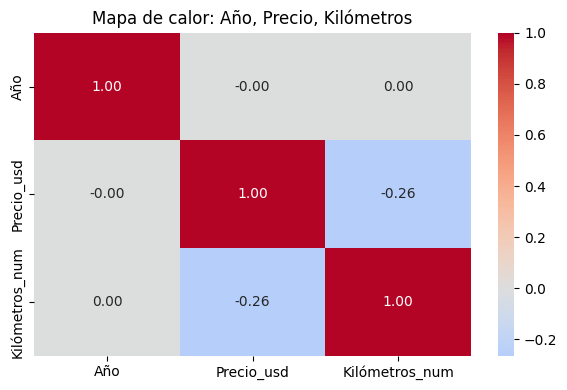

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas que te interesan
cols = ['Año', 'Precio_usd', 'Kilómetros_num']

# Calcular matriz de correlaciones
correlaciones = df_modelo[cols].corr(numeric_only=True)

# Ordenar por correlación con el precio
correlacion_con_precio = correlaciones['Precio_usd'].sort_values(ascending=False)
print("📊 Correlación de cada variable con Precio_usd:")
print(correlacion_con_precio)

# Graficar heatmap de correlaciones
plt.figure(figsize=(6, 4))
sns.heatmap(correlaciones, cmap='coolwarm', annot=True, fmt=".2f", center=0)
plt.title("Mapa de calor: Año, Precio, Kilómetros")
plt.tight_layout()
plt.show()




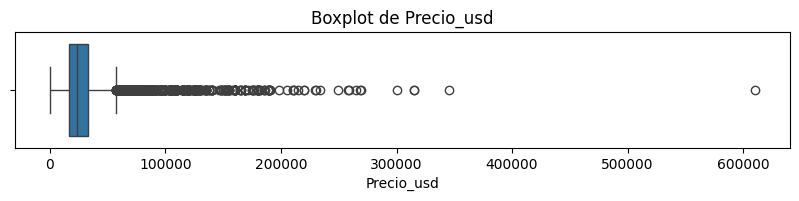

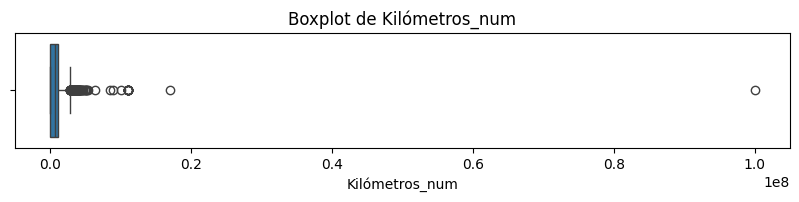

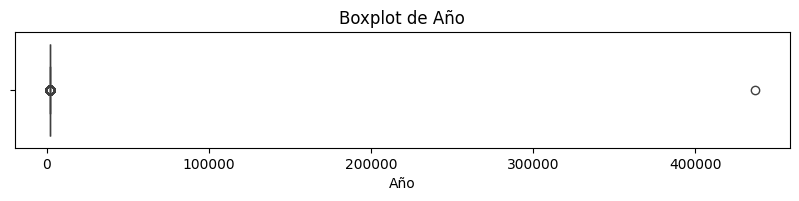

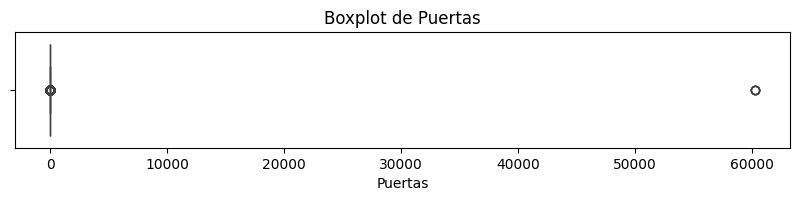

Precio_usd: 935 outliers
Kilómetros_num: 209 outliers
Año: 260 outliers
Puertas: 523 outliers


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt


columnas_numericas = ['Precio_usd', 'Kilómetros_num', 'Año', 'Puertas']

for col in columnas_numericas:
    plt.figure(figsize=(10, 1.5))
    sns.boxplot(x=df_modelo[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

    
for col in columnas_numericas:
    Q1 = df_modelo[col].quantile(0.25)
    Q3 = df_modelo[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_modelo[(df_modelo[col] < Q1 - 1.5 * IQR) | (df_modelo[col] > Q3 + 1.5 * IQR)]
    cantidad = outliers.shape[0]
    print(f"{col}: {cantidad} outliers")

In [21]:
# Copia de trabajo
df_sin_outliers = df_modelo.copy()

# Lista de columnas numéricas
columnas_numericas = ['Kilómetros_num', 'Año', 'Precio_usd', 'Puertas']  # ajustá según tu dataset

# Eliminar outliers en cada columna numérica
for col in columnas_numericas:
    Q1 = df_sin_outliers[col].quantile(0.25)
    Q3 = df_sin_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtramos dentro de los límites
    df_sin_outliers = df_sin_outliers[
        (df_sin_outliers[col] >= limite_inferior) & (df_sin_outliers[col] <= limite_superior)
    ]

    print(f"{col}: datos fuera de rango eliminados. Filas restantes: {df_sin_outliers.shape[0]}")


Kilómetros_num: datos fuera de rango eliminados. Filas restantes: 18045
Año: datos fuera de rango eliminados. Filas restantes: 17869
Precio_usd: datos fuera de rango eliminados. Filas restantes: 16943
Puertas: datos fuera de rango eliminados. Filas restantes: 16504


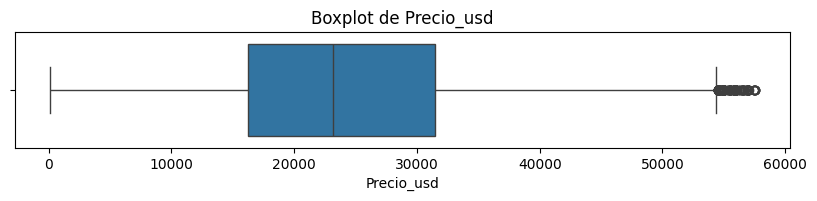

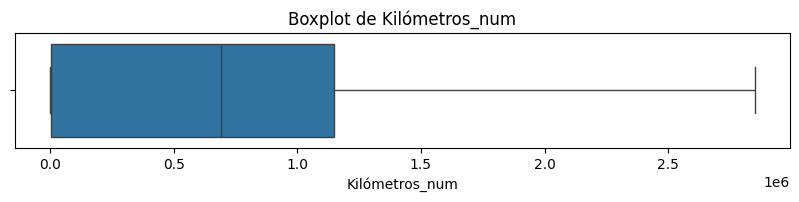

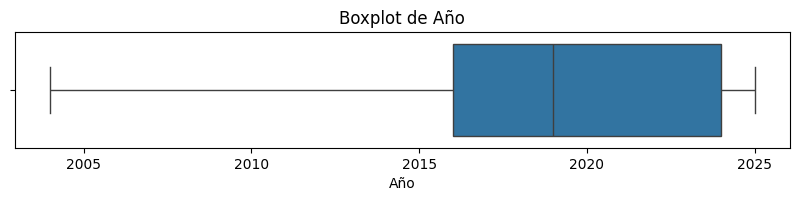

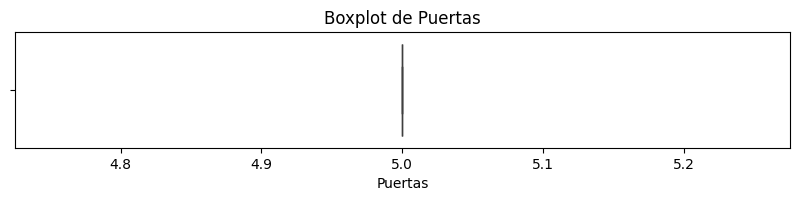

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


columnas_numericas = ['Precio_usd', 'Kilómetros_num', 'Año', 'Puertas']

for col in columnas_numericas:
    plt.figure(figsize=(10, 1.5))
    sns.boxplot(x=df_sin_outliers[col])
    plt.title(f"Boxplot de {col}")
    plt.show()



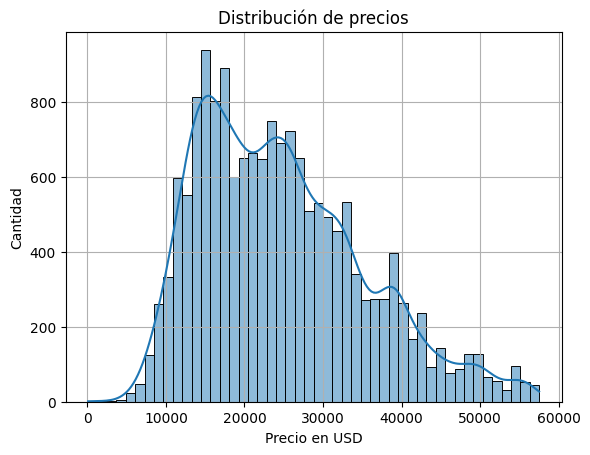

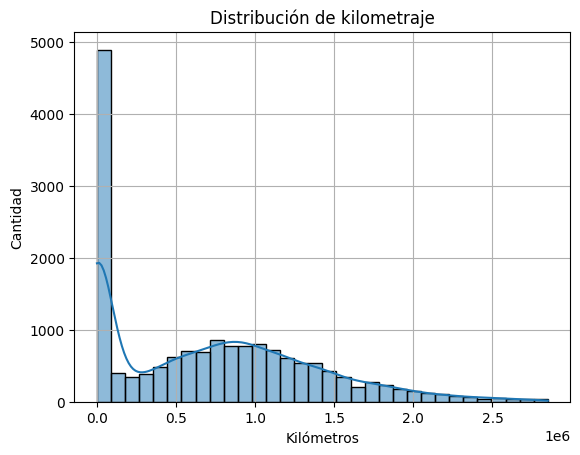

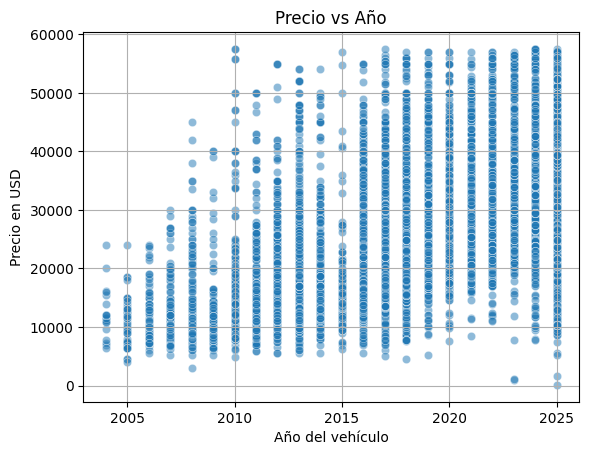

In [23]:
# Histograma de precios
sns.histplot(df_sin_outliers['Precio_usd'], kde=True)
plt.title("Distribución de precios")
plt.xlabel("Precio en USD")
plt.ylabel("Cantidad")
plt.grid(True)
plt.show()

# Distribución de kilómetros
sns.histplot(df_sin_outliers['Kilómetros_num'], kde=True)
plt.title("Distribución de kilometraje")
plt.xlabel("Kilómetros")
plt.ylabel("Cantidad")
plt.grid(True)
plt.show()

# Relación año vs. precio
sns.scatterplot(x='Año', y='Precio_usd', data=df_sin_outliers, alpha=0.5)
plt.title("Precio vs Año")
plt.xlabel("Año del vehículo")
plt.ylabel("Precio en USD")
plt.grid(True)
plt.show()



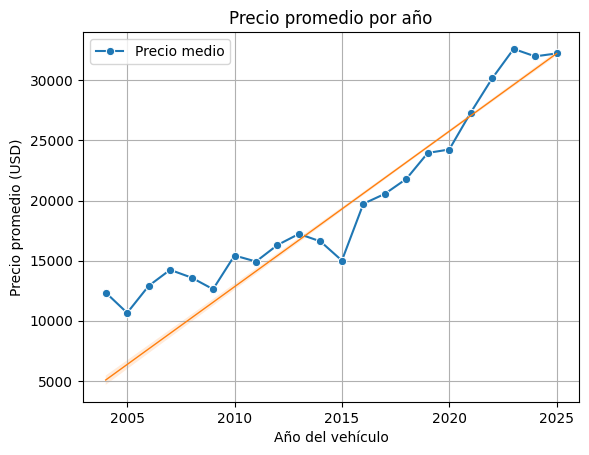

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Precio medio por año
precio_medio = (
    df_sin_outliers
      .groupby('Año')['Precio_usd']
      .mean()
      .reset_index()
)

sns.lineplot(data=precio_medio, x='Año', y='Precio_usd', marker='o',label='Precio medio')
sns.regplot(
data=df_sin_outliers,
    x='Año', y='Precio_usd',
    lowess=False,          # suavizado local
    scatter=False,        # no muestres puntos
    line_kws={'lw': 1},
    label='Tendencia'  # etiqueta para la línea de regresión
)
plt.title("Precio promedio por año")
plt.xlabel("Año del vehículo")
plt.ylabel("Precio promedio (USD)")
plt.grid(True)
plt.show()


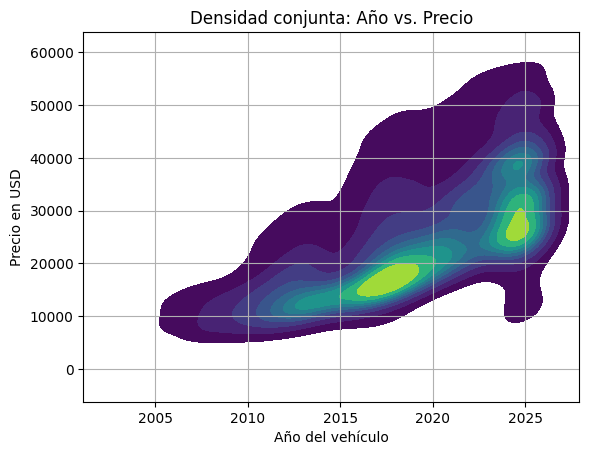

In [25]:
sns.kdeplot(
    data=df_sin_outliers,
    x='Año', y='Precio_usd',
    fill=True, cmap='viridis',
    thresh=0.05          # sube o baja para más/menos detalle
)
plt.title("Densidad conjunta: Año vs. Precio")
plt.xlabel("Año del vehículo")
plt.ylabel("Precio en USD")
plt.grid(True)
plt.show()


C:\Users\andyd\AppData\Local\Temp\ipykernel_12904\140283020.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('rango_km')['Precio_usd']


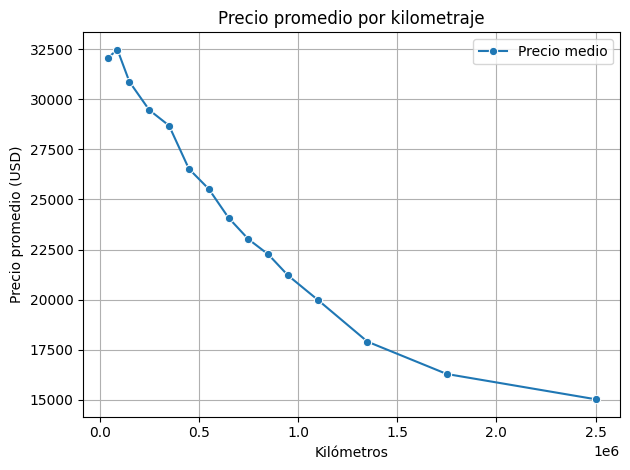

In [26]:

# Crear bins de kilometraje
bins_km = [0, 80000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 1200000, 1500000, 2000000, 3000000, 4000000, 5000000]
labels_km = [f'{bins_km[i]}-{bins_km[i+1]}' for i in range(len(bins_km)-1)]

df_sin_outliers['rango_km'] = pd.cut(df_sin_outliers['Kilómetros_num'], bins=bins_km, labels=labels_km, include_lowest=True)

precio_vs_km = (
    df_sin_outliers
      .groupby('rango_km')['Precio_usd']
      .mean()
      .reset_index()
)
# Mapear los labels a sus centros
precio_vs_km['km_centro'] = [np.mean([int(b.split('-')[0]), int(b.split('-')[1])]) for b in precio_vs_km['rango_km'].astype(str)]

sns.lineplot(data=precio_vs_km, x='km_centro', y='Precio_usd', marker='o', label='Precio medio')


plt.title("Precio promedio por kilometraje")
plt.xlabel("Kilómetros")
plt.ylabel("Precio promedio (USD)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



C:\Users\andyd\AppData\Local\Temp\ipykernel_12904\98063557.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=precio_marca, x='Marca', y='Precio_usd', palette='viridis')


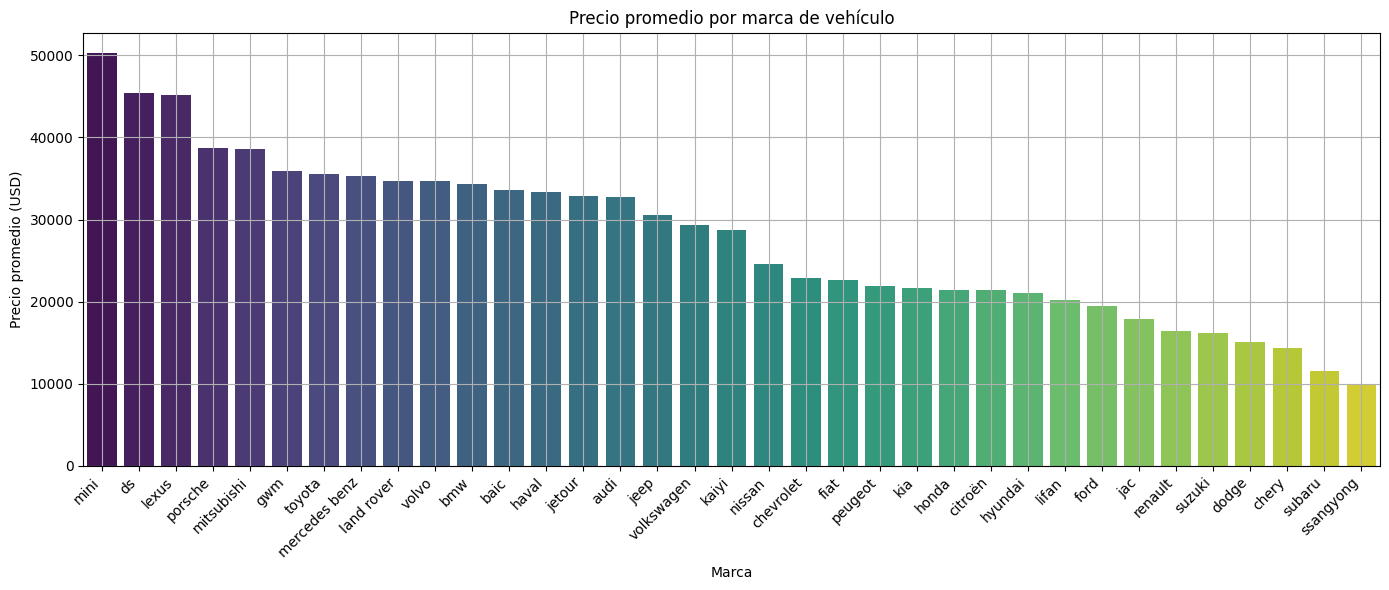

In [42]:
# Detectar columnas que corresponden a marcas (empiezan con "Marca_")
columnas_marca = [col for col in df_sin_outliers.columns if col.startswith('Marca_')]

# Para cada fila, encontrar qué columna 'Marca_*' tiene un 1
df_sin_outliers['Marca'] = df_sin_outliers[columnas_marca].idxmax(axis=1).str.replace('Marca_', '', regex=False)

precio_marca = (
    df_sin_outliers
    .groupby('Marca')['Precio_usd']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.barplot(data=precio_marca, x='Marca', y='Precio_usd', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Precio promedio por marca de vehículo')
plt.xlabel('Marca')
plt.ylabel('Precio promedio (USD)')
plt.tight_layout()
plt.grid(True)
plt.show()


In [44]:
df_sin_outliers.drop(columns=['Marca'], inplace=True)
df_sin_outliers.drop(columns=['rango_km'], inplace=True)

KeyError: "['rango_km'] not found in axis"

In [38]:
#guardar el DataFrame final
df_sin_outliers.to_csv("dataset_basico.csv", index=False)

In [39]:
from sklearn.model_selection import train_test_split

X = df_sin_outliers.drop(columns='Precio_usd')
y = df_sin_outliers['Precio_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# ---------- espacio de búsqueda SIN bootstrap=False ----------
param_dist = {
    "n_estimators":      randint(200, 1200),
    "max_depth":         randint(4, 40),
    "max_features":      uniform(0.3, 0.7),
    "min_samples_split": randint(2, 15),
    "min_samples_leaf":  randint(1, 10),
    # bootstrap se fija en True al dejarlo fuera del dict
}

neg_rmse = make_scorer(
    lambda y_true, y_pred: -np.sqrt(mean_squared_error(y_true, y_pred)),
    greater_is_better=True
)

rf = RandomForestRegressor(
    random_state=42,
    oob_score=True,   # ahora siempre compatible
    n_jobs=-1
)

rnd_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    scoring=neg_rmse,
    cv=5,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

rnd_search.fit(X_train, y_train)

print(f"✅ Mejor RMSE CV: {-rnd_search.best_score_:,.2f} USD")
print("Mejores hiperparámetros:", rnd_search.best_params_)

best_rf = rnd_search.best_estimator_
y_pred = best_rf.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"🟠 RMSE en test: {rmse_test:,.2f} USD")

# OOB solo disponible porque bootstrap=True
print(f"OOB R²: {best_rf.oob_score_:.3f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
✅ Mejor RMSE CV: 4,729.45 USD
Mejores hiperparámetros: {'max_depth': 24, 'max_features': 0.5720741027826374, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 991}
🟠 RMSE en test: 4,473.36 USD
OOB R²: 0.803


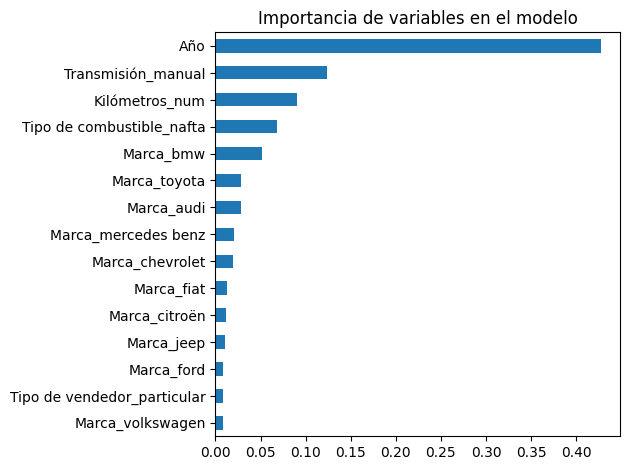

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

importancias = pd.Series(random_forest_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Mostrar top 15
importancias.head(15).plot(kind='barh')
plt.title("Importancia de variables en el modelo")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# ------------------------------------------------------------------
# 1. VARIABLES   (ajusta la lista num_cols según tu DataFrame)
# ------------------------------------------------------------------
target = 'Precio_usd'
num_cols = ['Año', 'Kilómetros_num', 'Puertas']          # numéricas reales
X = df_sin_outliers.drop(columns=target)
y = df_sin_outliers[target]

# ------------------------------------------------------------------
# 2. SPLIT TRAIN / TEST
# ------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------------------------------------------
# 3. PREPROCESADO: escalar solo numéricas
# ------------------------------------------------------------------
preprocesado = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols)   # escala solo estas
        # el resto (dummies) pasa sin cambios
    ],
    remainder='passthrough'
)

# ------------------------------------------------------------------
# 4. PIPELINE completo: preprocesado + modelo
# ------------------------------------------------------------------
modelo_lr = Pipeline(steps=[
    ('prep', preprocesado),
    ('reg', LinearRegression())
])

# ------------------------------------------------------------------
# 5. ENTRENAR
# ------------------------------------------------------------------
modelo_lr.fit(X_train, y_train)

# ------------------------------------------------------------------
# 6. EVALUAR
# ------------------------------------------------------------------
y_pred = modelo_lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE de regresión lineal: {rmse:.2f} USD")

# ------------------------------------------------------------------
# 7. COEFICIENTES para interpretación
# ------------------------------------------------------------------
# Recuperar nombres finales de columnas
feature_names = (num_cols +                                  # primero las escaladas
                 [c for c in X.columns if c not in num_cols]) # luego los dummies

coeficientes = pd.Series(
    modelo_lr.named_steps['reg'].coef_,
    index=feature_names
).sort_values(key=abs, ascending=False)

print("\nCoeficientes ordenados por influencia:")
print(coeficientes.head(20))


RMSE de regresión lineal: 5342.27 USD

Coeficientes ordenados por influencia:
Puertas                           -7.533561e+16
Marca_daihatsu                    -3.735739e+16
Marca_jaguar                       5.883490e+15
Marca_isuzu                        4.088260e+15
Tipo de combustible_mild hybrid    2.159982e+13
Marca_jac                         -2.967013e+04
Marca_fiat                        -2.906901e+04
Marca_kaiyi                       -2.759955e+04
Marca_citroën                     -2.682914e+04
Marca_chery                       -2.460758e+04
Marca_chevrolet                   -2.446544e+04
Marca_peugeot                     -2.420627e+04
Marca_lifan                       -2.295437e+04
Marca_nissan                      -2.225228e+04
Marca_renault                     -2.218000e+04
Marca_dodge                       -2.187781e+04
Marca_haval                       -2.160804e+04
Marca_ssangyong                   -2.141400e+04
Marca_ford                        -2.069368e+04
Marca_jeto